In \[1\]:

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error
    from sklearn.preprocessing import LabelEncoder
    import warnings
    warnings.simplefilter('ignore')
    from pandas import set_option
    from sklearn.model_selection import cross_val_score
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import RandomizedSearchCV
    from scipy.stats import randint as sp_randint
    from sklearn.linear_model import LinearRegression
    import copy as cp

In \[7\]:

    df1=pd.read_csv(r'C:\Users\USER\Downloads\used_cars_data.csv',engine='python')
    df1

Out\[7\]:

|      | S.No. | Name                                              | Location   | Year | Kilometers_Driven | Fuel_Type | Transmission | Owner_Type | Mileage    | Engine  | Power     | Seats | New_Price | Price |
|------|-------|---------------------------------------------------|------------|------|-------------------|-----------|--------------|------------|------------|---------|-----------|-------|-----------|-------|
| 0    | 0     | Maruti Wagon R LXI CNG                            | Mumbai     | 2010 | 72000             | CNG       | Manual       | First      | 26.6 km/kg | 998 CC  | 58.16 bhp | 5.0   | NaN       | 1.75  |
| 1    | 1     | Hyundai Creta 1.6 CRDi SX Option                  | Pune       | 2015 | 41000             | Diesel    | Manual       | First      | 19.67 kmpl | 1582 CC | 126.2 bhp | 5.0   | NaN       | 12.50 |
| 2    | 2     | Honda Jazz V                                      | Chennai    | 2011 | 46000             | Petrol    | Manual       | First      | 18.2 kmpl  | 1199 CC | 88.7 bhp  | 5.0   | 8.61 Lakh | 4.50  |
| 3    | 3     | Maruti Ertiga VDI                                 | Chennai    | 2012 | 87000             | Diesel    | Manual       | First      | 20.77 kmpl | 1248 CC | 88.76 bhp | 7.0   | NaN       | 6.00  |
| 4    | 4     | Audi A4 New 2.0 TDI Multitronic                   | Coimbatore | 2013 | 40670             | Diesel    | Automatic    | Second     | 15.2 kmpl  | 1968 CC | 140.8 bhp | 5.0   | NaN       | 17.74 |
| ...  | ...   | ...                                               | ...        | ...  | ...               | ...       | ...          | ...        | ...        | ...     | ...       | ...   | ...       | ...   |
| 7248 | 7248  | Volkswagen Vento Diesel Trendline                 | Hyderabad  | 2011 | 89411             | Diesel    | Manual       | First      | 20.54 kmpl | 1598 CC | 103.6 bhp | 5.0   | NaN       | NaN   |
| 7249 | 7249  | Volkswagen Polo GT TSI                            | Mumbai     | 2015 | 59000             | Petrol    | Automatic    | First      | 17.21 kmpl | 1197 CC | 103.6 bhp | 5.0   | NaN       | NaN   |
| 7250 | 7250  | Nissan Micra Diesel XV                            | Kolkata    | 2012 | 28000             | Diesel    | Manual       | First      | 23.08 kmpl | 1461 CC | 63.1 bhp  | 5.0   | NaN       | NaN   |
| 7251 | 7251  | Volkswagen Polo GT TSI                            | Pune       | 2013 | 52262             | Petrol    | Automatic    | Third      | 17.2 kmpl  | 1197 CC | 103.6 bhp | 5.0   | NaN       | NaN   |
| 7252 | 7252  | Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan... | Kochi      | 2014 | 72443             | Diesel    | Automatic    | First      | 10.0 kmpl  | 2148 CC | 170 bhp   | 5.0   | NaN       | NaN   |

7253 rows × 14 columns

In \[9\]:

    #Splitting company name from CarName column
    CompanyName = df1['Name'].apply(lambda x : x.split(' ')[0])
    df1.insert(3,"CompanyName",CompanyName)
    df1.drop(['Name'],axis=1,inplace=True)
    df1.head()

Out\[9\]:

|     | S.No. | Location   | CompanyName | Year | Kilometers_Driven | Fuel_Type | Transmission | Owner_Type | Mileage    | Engine  | Power     | Seats | New_Price | Price |
|-----|-------|------------|-------------|------|-------------------|-----------|--------------|------------|------------|---------|-----------|-------|-----------|-------|
| 0   | 0     | Mumbai     | Maruti      | 2010 | 72000             | CNG       | Manual       | First      | 26.6 km/kg | 998 CC  | 58.16 bhp | 5.0   | NaN       | 1.75  |
| 1   | 1     | Pune       | Hyundai     | 2015 | 41000             | Diesel    | Manual       | First      | 19.67 kmpl | 1582 CC | 126.2 bhp | 5.0   | NaN       | 12.50 |
| 2   | 2     | Chennai    | Honda       | 2011 | 46000             | Petrol    | Manual       | First      | 18.2 kmpl  | 1199 CC | 88.7 bhp  | 5.0   | 8.61 Lakh | 4.50  |
| 3   | 3     | Chennai    | Maruti      | 2012 | 87000             | Diesel    | Manual       | First      | 20.77 kmpl | 1248 CC | 88.76 bhp | 7.0   | NaN       | 6.00  |
| 4   | 4     | Coimbatore | Audi        | 2013 | 40670             | Diesel    | Automatic    | Second     | 15.2 kmpl  | 1968 CC | 140.8 bhp | 5.0   | NaN       | 17.74 |

In \[10\]:

    df1.CompanyName.unique()

Out\[10\]:

    array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
           'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
           'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
           'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
           'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
           'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In \[11\]:

    df1.CompanyName = df1.CompanyName.str.lower()

    def replace_name(a,b):
        df1.CompanyName.replace(a,b,inplace=True)

    replace_name('maxda','mazda')
    replace_name('porcshce','porsche')
    replace_name('toyouta','toyota')
    replace_name('vokswagen','volkswagen')
    replace_name('vw','volkswagen')

    df1.CompanyName.unique()

Out\[11\]:

    array(['maruti', 'hyundai', 'honda', 'audi', 'nissan', 'toyota',
           'volkswagen', 'tata', 'land', 'mitsubishi', 'renault',
           'mercedes-benz', 'bmw', 'mahindra', 'ford', 'porsche', 'datsun',
           'jaguar', 'volvo', 'chevrolet', 'skoda', 'mini', 'fiat', 'jeep',
           'smart', 'ambassador', 'isuzu', 'force', 'bentley', 'lamborghini',
           'hindustan', 'opelcorsa'], dtype=object)

In \[13\]:

    df1.loc[df1.duplicated()]

Out\[13\]:

S.No.

Location

CompanyName

Year

Kilometers_Driven

Fuel_Type

Transmission

Owner_Type

Mileage

Engine

Power

Seats

New_Price

Price

In \[14\]:

    df1.columns

Out\[14\]:

    Index(['S.No.', 'Location', 'CompanyName', 'Year', 'Kilometers_Driven',
           'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
           'Seats', 'New_Price', 'Price'],
          dtype='object')

In \[16\]:

    plt.figure(figsize=(20,8))

    plt.subplot(1,2,1)
    plt.title('Car Price Distribution Plot')
    sns.distplot(df1.Price)

    plt.subplot(1,2,2)
    plt.title('Car Price Spread')
    sns.boxplot(y=df1.Price)

    plt.show()

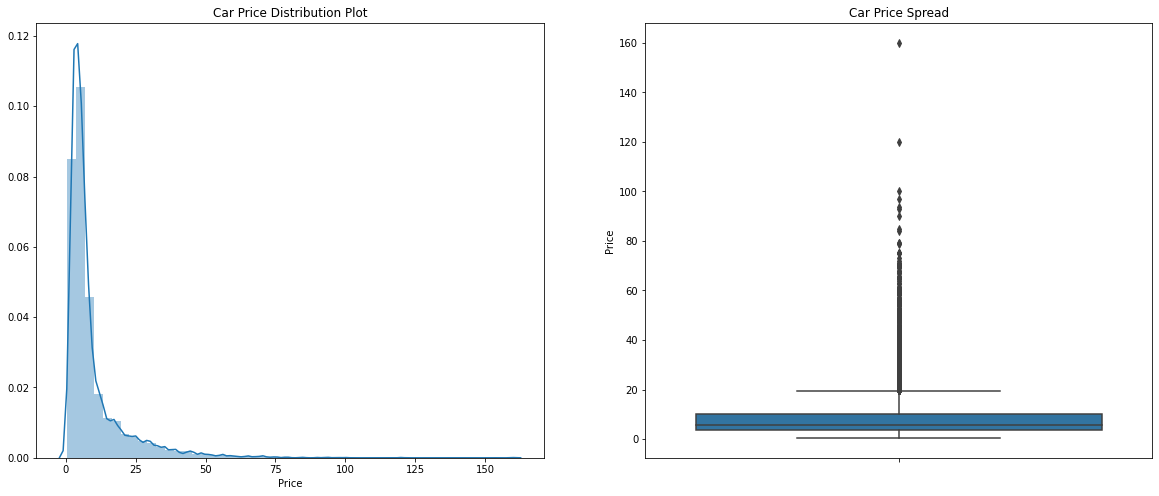

In \[19\]:

    print(df1.Price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

    count    6019.000000
    mean        9.479468
    std        11.187917
    min         0.440000
    25%         3.500000
    50%         5.640000
    75%         9.950000
    85%        16.500000
    90%        22.500000
    100%      160.000000
    max       160.000000
    Name: Price, dtype: float64

Inference :

1.  The plot seemed to be right-skewed, meaning that the most prices in
    the dataset are low(Below 15,000).

2.  There is a significant difference between the mean and the median of
    the price distribution.

3.  The data points are far spread out from the mean, which indicates a
    high variance in the car prices.(85% of the prices are below 16,000,
    whereas the remaining 15% are between 10,000 and 45,400.)

In \[33\]:

    plt.figure(figsize=(25, 6))

    plt.subplot(1,3,1)
    plt1 = df1.CompanyName.value_counts().plot(kind = 'bar')
    plt.title('Companies Histogram')
    plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

    plt.subplot(1,3,2)
    plt1 = df1.Fuel_Type.value_counts().plot(kind = 'bar')
    plt.title('Fuel Type Histogram')
    plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

    plt.subplot(1,3,3)
    plt1 = df1.Location.value_counts().plot(kind = 'bar')
    plt.title('Location Histogram')
    plt1.set(xlabel = 'Location', ylabel='Frequency of Location')

    plt.show()

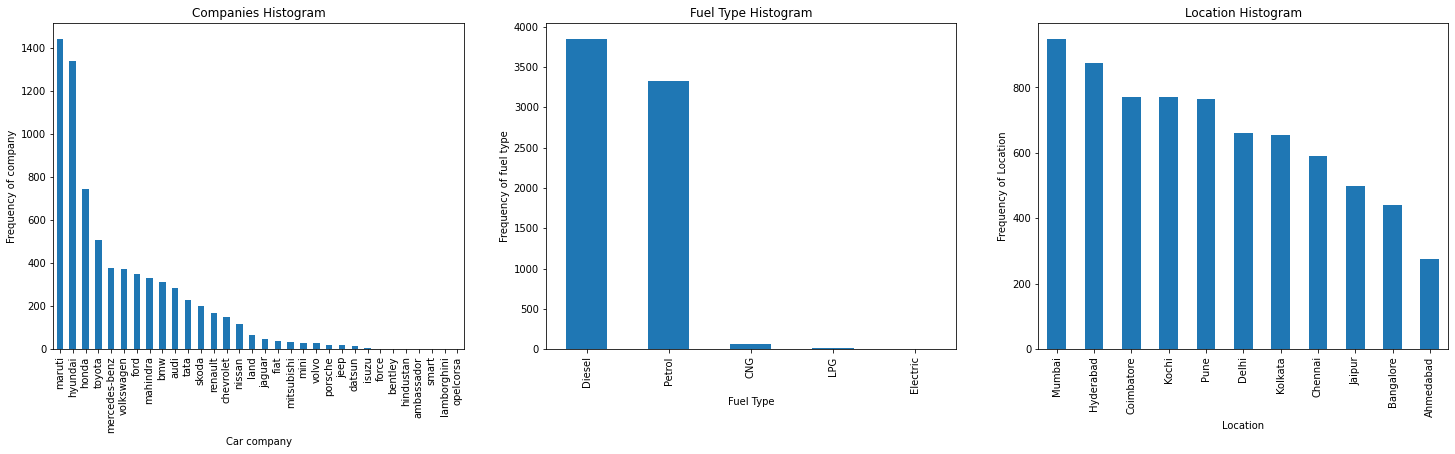

Inference :

1.  maruti seemed to be favored car company.
2.  Number of diesel fueled cars are more than other fuel type.
3.  Mumbai is the top Location prefered.

In \[36\]:

    plt.figure(figsize=(20,8))

    plt.subplot(1,2,1)
    plt.title('Owner_Type Histogram')
    sns.countplot(df1.Owner_Type, palette=("cubehelix"))

    plt.subplot(1,2,2)
    plt.title('Owner_Type vs Price')
    sns.boxplot(x=df1.Owner_Type, y=df1.Price, palette=("cubehelix"))

    plt.show()

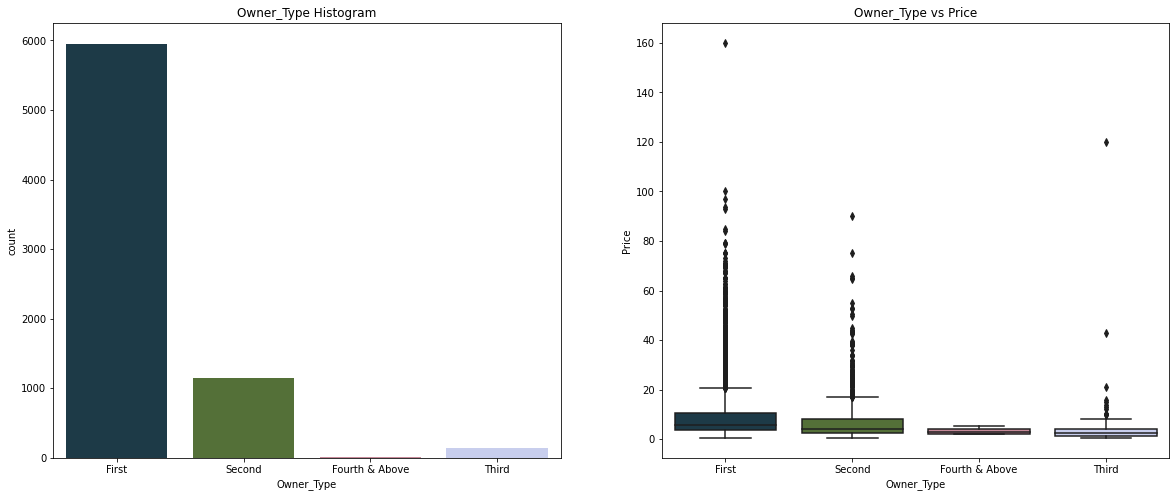

Inference :

1.  It seems that the Owner_Type with First and second values have high
    number of rows (i.e. They are most sold.)
2.  The cars with First Owner_Type seems to be high priced (as it makes
    sense too, insurance risk rating is quite good).

In \[47\]:

    plt.figure(figsize=(20,8))

    plt.subplot(1,2,1)
    plt.title('Engine Type Histogram')
    sns.countplot(df1.Engine, palette=("Blues_d"))

    plt.subplot(1,2,2)
    plt.title('Engine Type vs Price')
    sns.boxplot(x=df1.Engine, y=df1.Price, palette=("PuBuGn"))

    plt.show()

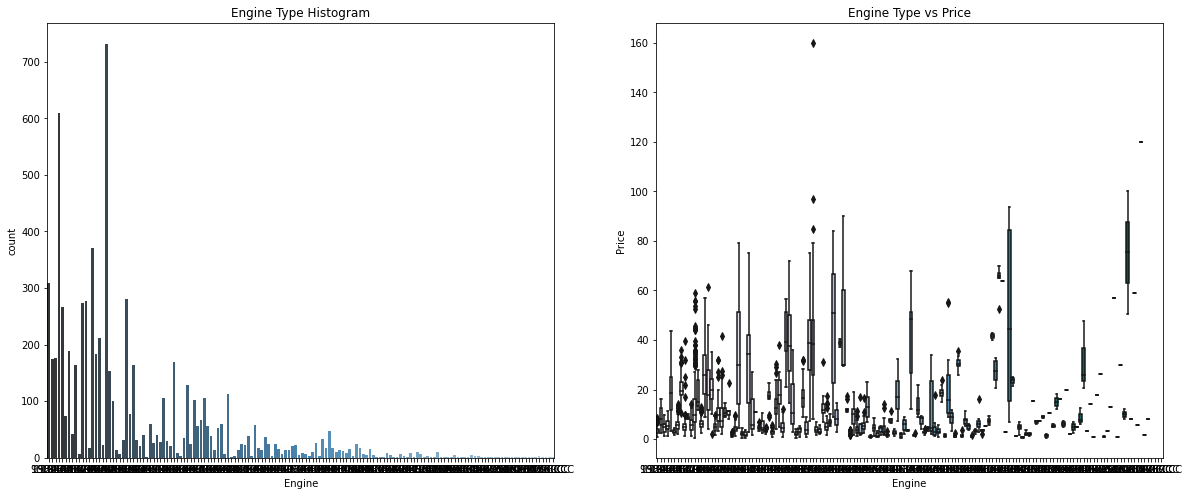

In \[51\]:

    plt.figure(figsize=(25, 6))

    df = pd.DataFrame(df1.groupby(['CompanyName'])['Price'].mean().sort_values(ascending = False))
    df.plot.bar()
    plt.title('Company Name vs Average Price')
    plt.show()

    df = pd.DataFrame(df1.groupby(['Fuel_Type'])['Price'].mean().sort_values(ascending = False))
    df.plot.bar()
    plt.title('Fuel Type vs Average Price')
    plt.show()

    df = pd.DataFrame(df1.groupby(['Transmission'])['Price'].mean().sort_values(ascending = False))
    df.plot.bar()
    plt.title('transmission vs Average Price')
    plt.show()

    <Figure size 1800x432 with 0 Axes>

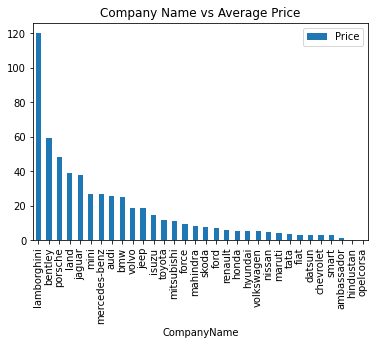

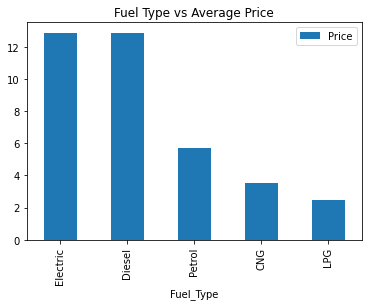

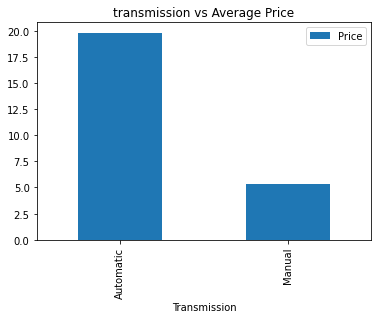

Inference :

1.  Lamborghini and bentley seem to have highest average price.

2.  Electric has higher average price than gas.

3.  Automatic has higher average price.

In \[52\]:

    plt.figure(figsize=(15,5))

    plt.subplot(1,2,1)
    plt.title('no.of Seats Histogram')
    sns.countplot(df1.Seats, palette=("plasma"))

    plt.subplot(1,2,2)
    plt.title('No.of Seats vs Price')
    sns.boxplot(x=df1.Seats, y=df1.Price, palette=("plasma"))

    plt.show()

    plt.figure(figsize=(15,5))

    plt.subplot(1,2,1)
    plt.title('Location Histogram')
    sns.countplot(df1.Location, palette=("plasma"))

    plt.subplot(1,2,2)
    plt.title('Location vs Price')
    sns.boxplot(x=df1.Location, y=df1.Price, palette=("plasma"))

    plt.show()

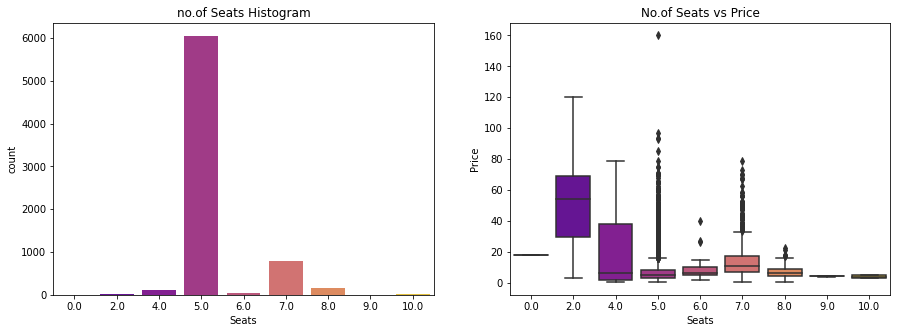

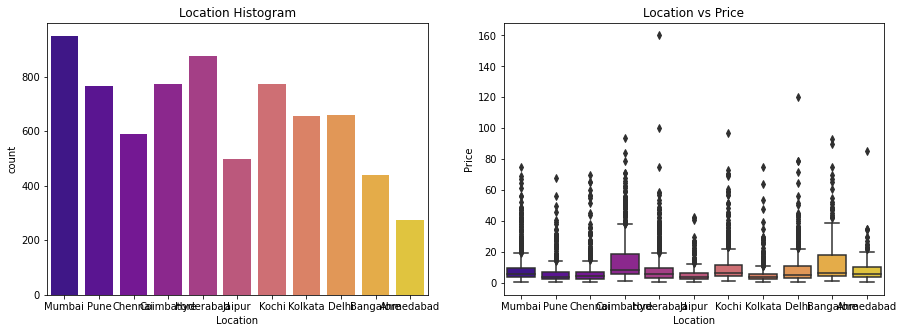

In \[66\]:

    plt.figure(figsize=(15,5))

    plt.subplot(1,2,1)
    plt.title('no.of Seats Histogram')
    sns.countplot(df1.Seats, palette=("plasma"))

    plt.subplot(1,2,2)
    plt.title('No.of Seats vs Price')
    sns.boxplot(x=df1.Seats, y=df1.New_Price, palette=("plasma"))

    plt.show()

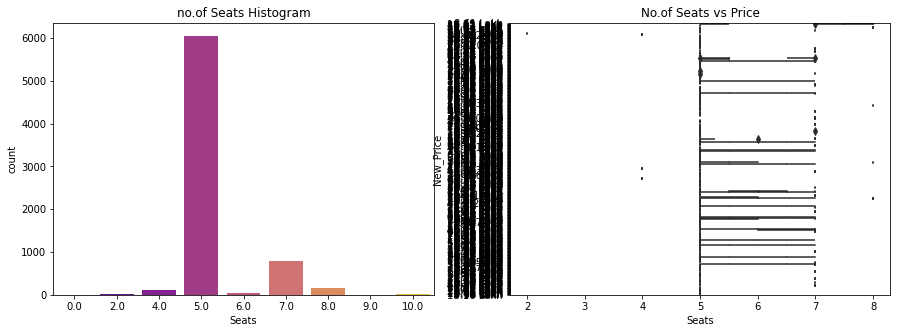

Inference :¶

1.No.of seat variable is not affacting the price much. There is no
sugnificant difference between the categories in it.

1.  It seems Location with Mumbai have higher price range than the Other
    location(though it has some high values outside.)

In \[54\]:

    def plot_count(x,fig):
        plt.subplot(4,2,fig)
        plt.title(x+' Histogram')
        sns.countplot(df1[x],palette=("magma"))
        plt.subplot(4,2,(fig+1))
        plt.title(x+' vs Price')
        sns.boxplot(x=df1[x], y=df1.Price, palette=("magma"))
        
    plt.figure(figsize=(15,20))

    plot_count('Location', 1)
    plot_count('Seats', 3)
    plot_count('Fuel_Type', 5)
    plot_count('Transmission', 7)

    plt.tight_layout()

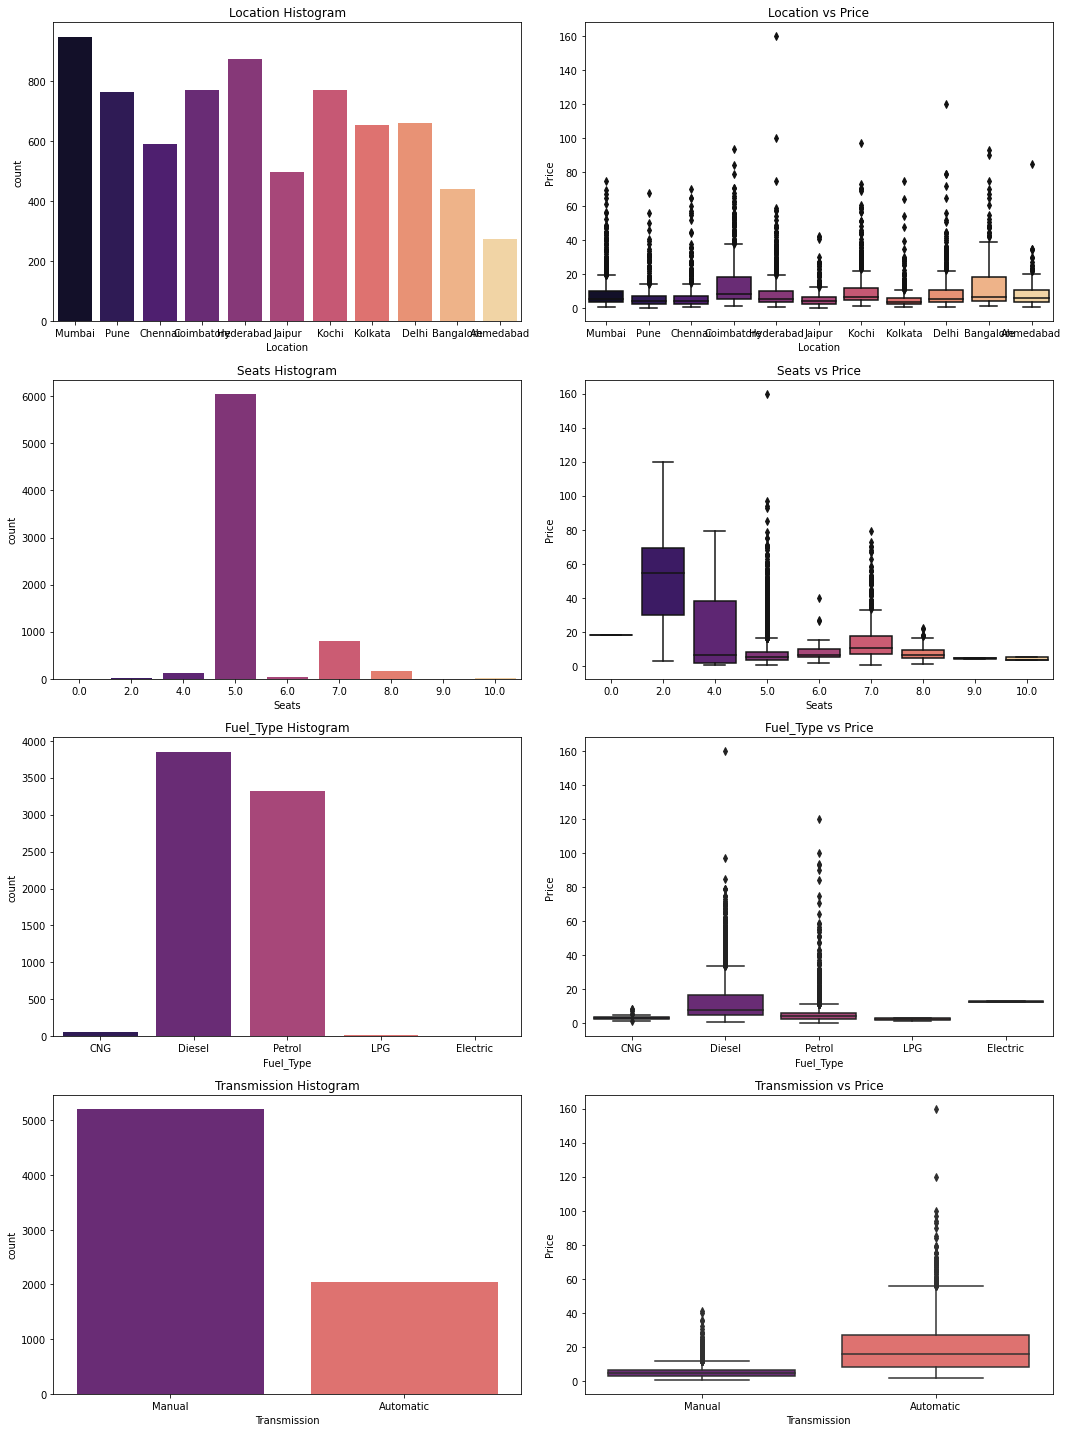

In \[61\]:

    plt.figure(figsize=(8,6))

    plt.title('Fuel economy vs Price')
    sns.scatterplot(x=df1['Engine'],y=df1['Price'],hue=df1['Fuel_Type'])
    plt.xlabel('Fuel Economy')
    plt.ylabel('Price')

    plt.show()
    plt.tight_layout()

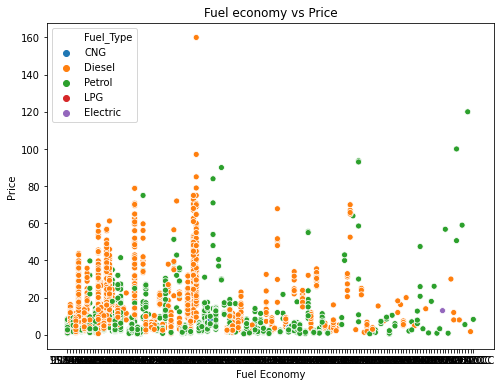

    <Figure size 432x288 with 0 Axes>

fueleconomy has an obvios negative correlation with price and is
significant.

In \[64\]:

    sns.pairplot(df1)
    plt.show()

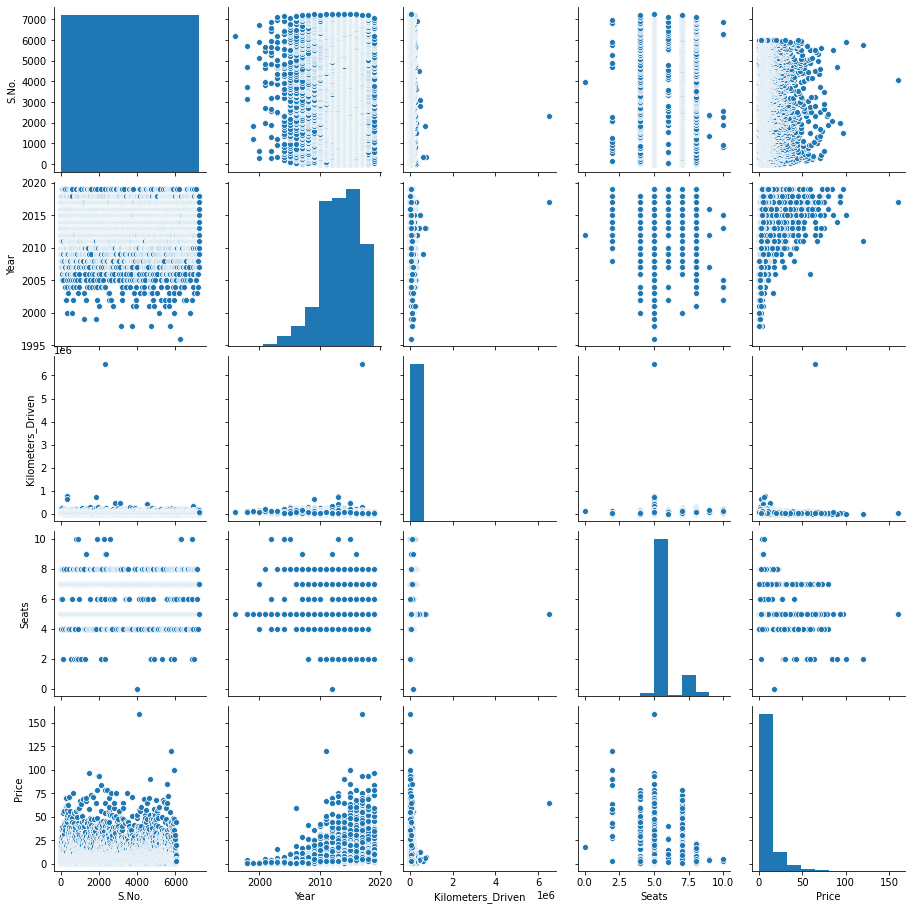

In \[ \]: